In [2]:
import tensorflow as tf
import numpy as np
import cv2

2022-11-24 17:51:25.776468: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 17:51:25.861135: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-24 17:51:25.861153: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-24 17:51:26.409670: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [3]:

## Encoder
enc_input= tf.keras.layers.Input(shape=(64,128,128,1))

# L[1]
x= tf.keras.layers.Conv3D(filters=32, kernel_size=3, strides= (2, 2, 2), padding='same', activation='relu', name='L1')(enc_input)
x= tf.keras.layers.BatchNormalization()(x)

# L[2]
x= tf.keras.layers.Conv3D(filters=64, kernel_size=3, strides= (2, 2, 2), padding='same', activation='relu', name='L2')(x)
x= tf.keras.layers.BatchNormalization()(x)

# L[3]
x= tf.keras.layers.Conv3D(filters=128, kernel_size=3, strides= (2, 2, 2), padding='same', activation='relu', name='L3')(x)
x= tf.keras.layers.BatchNormalization()(x)

# L[4]
x= tf.keras.layers.Conv3D(filters=256, kernel_size=3, strides= (2, 2, 2), padding='same', activation='sigmoid', name='L4')(x) #sigmoid for the code layer
x= tf.keras.layers.BatchNormalization()(x)
enc_output=  tf.keras.layers.Dropout(rate=0.1, name='code')(x)


## Decoder
# L[5]
x= tf.keras.layers.Conv3DTranspose(filters=128, kernel_size=3, strides=(2, 2, 2), padding='same', activation='relu')(enc_output)
x= tf.keras.layers.BatchNormalization()(x)

# L[6]
x= tf.keras.layers.Conv3DTranspose(filters=64, kernel_size=3, strides=(2, 2, 2), padding='same', activation='relu')(x)
x= tf.keras.layers.BatchNormalization()(x)

# L[7]
x= tf.keras.layers.Conv3DTranspose(filters=32, kernel_size=3, strides=(2, 2, 2), padding='same', activation='relu')(x)
x= tf.keras.layers.BatchNormalization()(x)

# L[8]
x= tf.keras.layers.Conv3DTranspose(filters=1, kernel_size=3, strides=(2, 2, 2), padding='same', activation='relu')(x)
dec_output= tf.keras.layers.BatchNormalization()(x)


auto_enc= tf.keras.Model(inputs=enc_input, outputs=dec_output)
auto_enc.summary()
auto_enc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 128, 128, 1)  0         
                             ]                                   
                                                                 
 L1 (Conv3D)                 (None, 32, 64, 64, 32)    896       
                                                                 
 batch_normalization (BatchN  (None, 32, 64, 64, 32)   128       
 ormalization)                                                   
                                                                 
 L2 (Conv3D)                 (None, 16, 32, 32, 64)    55360     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 32, 32, 64)   256       
 hNormalization)                                                 
                                                             

2022-11-24 17:51:33.646377: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/idrees/miniconda3/envs/tf/lib/python3.7/site-packages/cv2/../../lib64:
2022-11-24 17:51:33.646438: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/idrees/miniconda3/envs/tf/lib/python3.7/site-packages/cv2/../../lib64:
2022-11-24 17:51:33.646476: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/idrees/miniconda3/envs/tf/lib/python3.7/site-packages/cv2/../

In [3]:
#Load data set
X_64t_128s_OK= np.load("X_64t_128s_OK.npy")

In [15]:
auto_enc.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='mse')

auto_enc.fit(x=X_64t_128s_OK, y=X_64t_128s_OK, validation_split=0.20, epochs=100, batch_size=128)


Epoch 1/10
6/6 [==============================] - 95s 15s/step - loss: 0.0287 - val_loss: 0.0094
Epoch 2/10
6/6 [==============================] - 91s 15s/step - loss: 0.0270 - val_loss: 0.0098
Epoch 3/10
6/6 [==============================] - 91s 15s/step - loss: 0.0267 - val_loss: 0.0103
Epoch 4/10
6/6 [==============================] - 92s 15s/step - loss: 0.0245 - val_loss: 0.0107
Epoch 5/10
6/6 [==============================] - 92s 15s/step - loss: 0.0243 - val_loss: 0.0111
Epoch 6/10
6/6 [==============================] - 92s 15s/step - loss: 0.0239 - val_loss: 0.0115
Epoch 7/10
6/6 [==============================] - 91s 15s/step - loss: 0.0224 - val_loss: 0.0118
Epoch 8/10
6/6 [==============================] - 89s 15s/step - loss: 0.0229 - val_loss: 0.0122
Epoch 9/10
6/6 [==============================] - 87s 15s/step - loss: 0.0218 - val_loss: 0.0125
Epoch 10/10
6/6 [==============================] - 86s 14s/step - loss: 0.0213 - val_loss: 0.0128


In [17]:
#auto_enc.save("batch_128_v4")

INFO:tensorflow:Assets written to: batch_128_v4/assets


INFO:tensorflow:Assets written to: batch_128_v4/assets


In [9]:
# np.save("batch_64_v1_loss.npy", np.asarray(auto_enc.history.history['loss']))
# np.save("batch_64_v1_val_loss.npy", np.asarray(auto_enc.history.history['val_loss']))



In [41]:
#pred= auto_enc.predict(X_64t_128s_OK[0:7])
pred.shape

(7, 64, 128, 128, 1)

In [20]:
import matplotlib.pyplot as plt

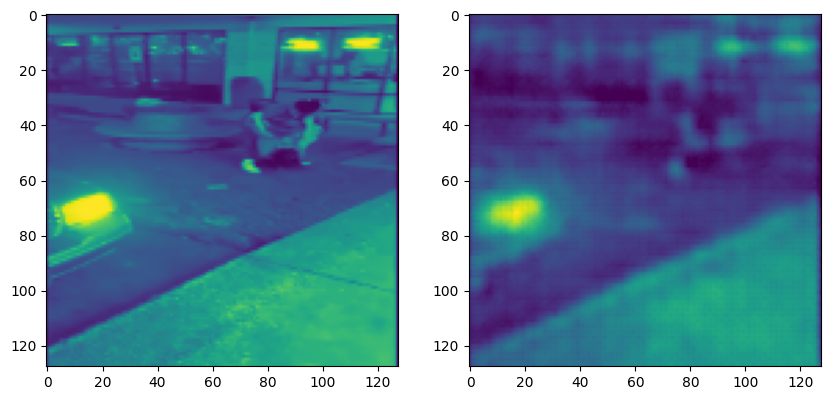

In [26]:
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(10,10))
axes[0].imshow(X_64t_128s_OK[5,0])
axes[1].imshow(pred[5,0])

### Video object to np  array

In [43]:
def vid2array(vid_objs): #Pass cv2 video capture objects and returns the np array 
    frame_tot= 64
    frame_width= 128
    frame_height= 128
    frame_channel= 1 #we consider grayscale image
    X= np.zeros(shape=(len(vid_objs), frame_tot,frame_width,frame_height,frame_channel)) #shape of training X

    for vid_no, video_item in enumerate(vid_objs):
        count=0
        while (vid_objs[vid_no].isOpened()):
            ret, frame= vid_objs[vid_no].read()
            if (ret==True) and (count>=0 and count<64):
                resized_frame = cv2.resize(frame, (frame_height,frame_width))
                grayFrame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2GRAY).reshape(((frame_height,frame_width, 1)))
                X[vid_no, count, :, :, :]= grayFrame/255.0
                count+=1
            else:
                break
        vid_objs[vid_no].release() #release the capt object

    return X

### Generate the Code

1/1 [==============================] - 0s 24ms/step
(10, 4, 8, 8, 256)


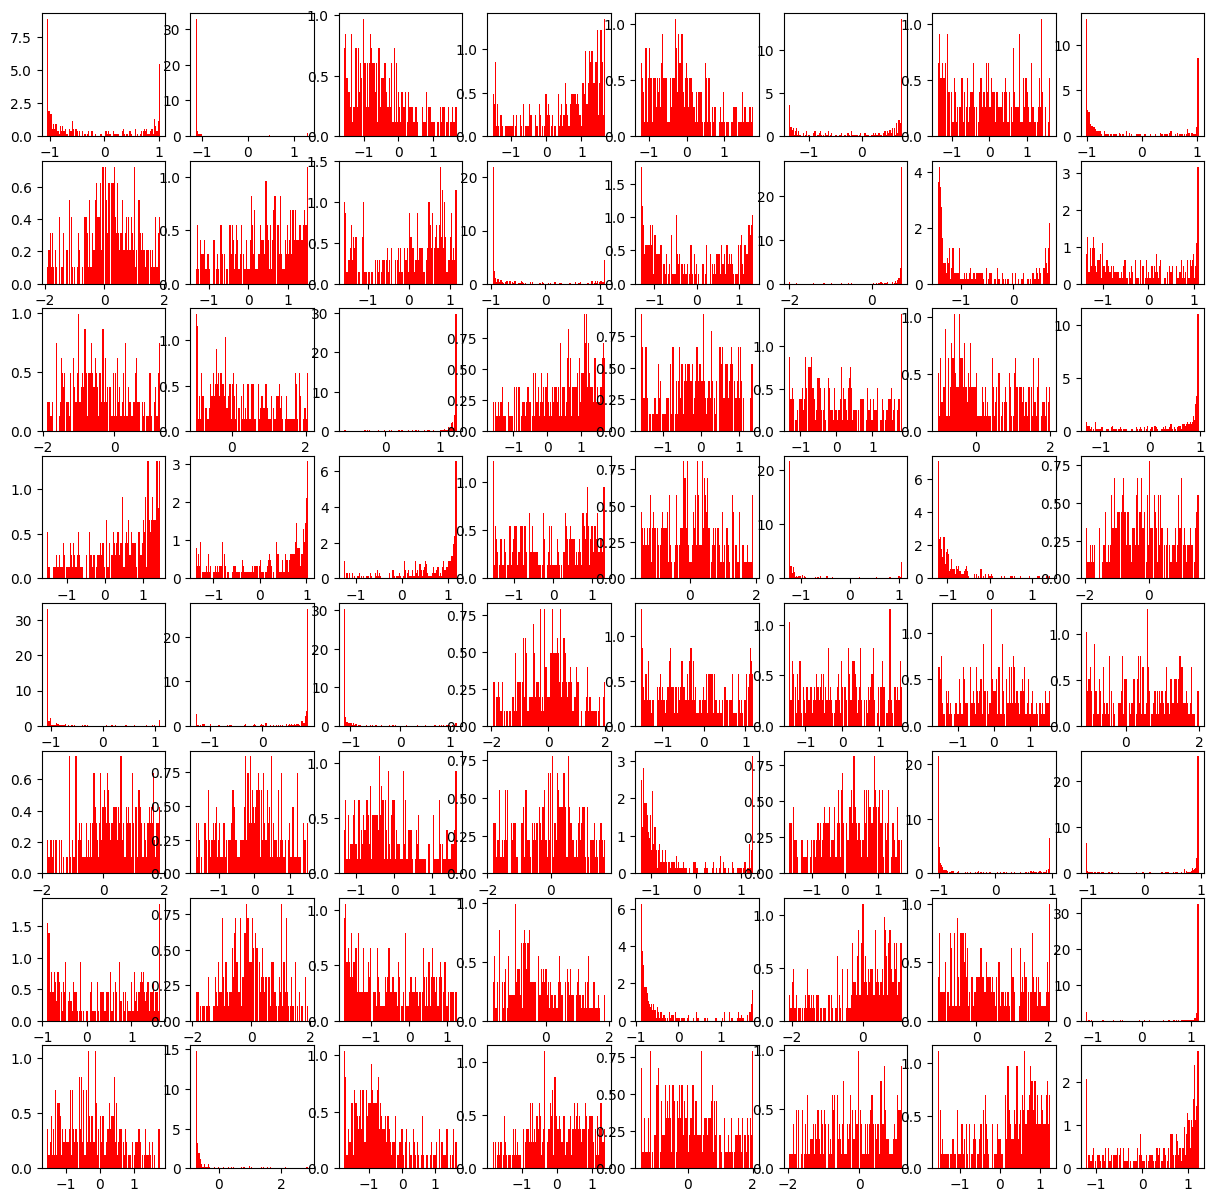

In [45]:
#enc= tf.keras.Model(inputs= enc_input, outputs= enc_output)
#enc_pred= enc.predict(X_64t_128s_OK[0:10])
X_normal= vid2array([cv2.VideoCapture("normalVideo.mp4")])
X_abnormal= vid2array([cv2.VideoCapture("agitatedVideo.mp4")])

normal_pred= enc.predict(X_normal)
abnormal_pred= enc.predict(X_abnormal)
print(enc_pred.shape)


fig, axes= plt.subplots(nrows=8, ncols=8, figsize=(15,15))
ch=0
for i in range(8):
    for j in range(8):
        axes[i,j].hist(abnormal_pred[0,:,:,:,ch].flatten(), bins=100, density=True, color='red')
        ch+=1

plt.show()

(1, 4, 8, 8, 256)
Mean: 0.0035061599
Std: 1.0736754
Normal


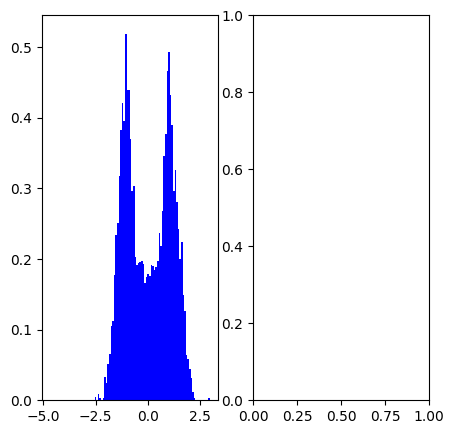

In [61]:
# plt.imshow(enc_pred[0,0,:,:,255])
print(normal_pred.shape)
normal_code= normal_pred[0].flatten()
abnormal_code= abnormal_pred[0].flatten()

# print("Mean: " + str(code.mean()))
# print("Std: " + str(code.std()))

fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(5,5))
axes[0].hist(normal_code, bins=100, density=True, color='blue')
axes[0].set_title("Normal")
axes[1].hist(abnormal_code, bins=100, density=True, color='red')
axes[1].set_title("Agitated")

In [58]:
print(abnormal_pred.shape)

print("Mean: " + str(code.mean()))
print("Std: " + str(code.std()))

(1, 4, 8, 8, 256)
Mean: -0.006384031
Std: 0.9223798


0.00836245

In [51]:
code.std()

0.9682625